In [1]:
# Importa librerias
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Define los dataframes
df_instacart_orders = pd.read_csv('datasets/instacart_orders.csv', delimiter=';')
df_products = pd.read_csv('datasets/products.csv', delimiter=';')
df_aisles = pd.read_csv('datasets/aisles.csv', delimiter=';')
df_departments = pd.read_csv('datasets/departments.csv', delimiter=';')
df_order_products = pd.read_csv('datasets/order_products.csv', delimiter=';')

In [8]:
# Muestra informacion de los dataframes
print("Información de df_instacart_orders:")
print(df_instacart_orders.info())
print()

print("Información de df_products:")
print(df_products.info())
print()

print("Información de df_aisles:")
print(df_aisles.info())
print()

print("Información de df_departments:")
print(df_departments.info())
print()

print("Información de df_order_products:")
print(df_order_products.info())

Información de df_instacart_orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

Información de df_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   departmen

In [9]:
# Revisa si hay pedidos duplicados
instacart_orders_duplicates = df_instacart_orders.duplicated().sum()
instacart_orders_duplicated_rows = df_instacart_orders[df_instacart_orders.duplicated()]

if instacart_orders_duplicates > 0:
    print(f"Hay {instacart_orders_duplicates} pedidos duplicados en df_instacart_orders.")
else:
    print("No hay pedidos duplicados en df_instacart_orders.")
    
display(instacart_orders_duplicated_rows)

Hay 15 pedidos duplicados en df_instacart_orders.


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [10]:
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_2am_orders = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) 
                        & (df_instacart_orders['order_hour_of_day'] == 2)]

display(wednesday_2am_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [11]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates()

In [12]:
# Vuelve a verificar si hay filas duplicadas
# Elimina los pedidos duplicados
duplicates_after_removal = df_instacart_orders.duplicated().sum()

if duplicates_after_removal > 0:
    print(f"Hay {duplicates_after_removal} filas duplicadas en df_instacart_orders después de la eliminación.")
else:
    print("No hay filas duplicadas en df_instacart_orders después de la eliminación.")

No hay filas duplicadas en df_instacart_orders después de la eliminación.


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicated_order_ids = df_instacart_orders['order_id'].duplicated().sum()

if duplicated_order_ids > 0:
    print(f"Hay {duplicated_order_ids} IDs de pedidos duplicados en df_instacart_orders.")
else:
    print("No hay IDs de pedidos duplicados en df_instacart_orders.")

No hay IDs de pedidos duplicados en df_instacart_orders.


In [14]:
# Verifica si hay filas totalmente duplicadas en df_products
products_duplicates = df_products.duplicated().sum()

if products_duplicates > 0:
    print(f"Hay {products_duplicates} productos duplicados en df_products.")
else:
    print("No hay productos duplicados en df_products.")

No hay productos duplicados en df_products.


In [15]:
# Verifica únicamente si hay IDs duplicadas de productos en df_products
duplicated_products_ids = df_products['product_id'].duplicated().sum()

if duplicated_products_ids > 0:  
    print(f"Hay {duplicated_products_ids} IDs de productos duplicados en df_products.")
else:
    print("No hay IDs de productos duplicados en df_products.")

No hay IDs de productos duplicados en df_products.


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
duplicated_product_names = df_products['product_name'].duplicated().sum()

if duplicated_product_names > 0:
    print(f"Hay {duplicated_product_names} nombres de productos duplicados en df_products.")
else:
    print("No hay nombres de productos duplicados en df_products.")

Hay 1361 nombres de productos duplicados en df_products.


In [ ]:
# Revisa si hay nombres de productos duplicados en df_products
duplicated_product_names = df_products[df_products['product_name'].notnull()]['product_name'].duplicated().sum()

if duplicated_product_names > 0:
    print(f"Hay {duplicated_product_names} nombres de productos duplicados (no faltantes) en df_products.")
else:
    print("No hay nombres de productos duplicados (no faltantes) en df_products.")

In [17]:
# Revisa si hay filas totalmente duplicadas en df_departments
departments_duplicates = df_departments.duplicated().sum()

if departments_duplicates > 0:
    print(f"Hay {departments_duplicates} departamentos duplicados en df_departments.")
else:
    print("No hay departamentos duplicados en df_departments.")

No hay departamentos duplicados en df_departments.


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos en department_id
duplicated_departments_ids = df_departments['department_id'].duplicated().sum()

if duplicated_departments_ids > 0:
    print(f"Hay {duplicated_departments_ids} IDs de departmentos duplicados.")
else:
    print("No hay IDs de departmanetos duplicados.")

No hay IDs de departmanetos duplicados.


In [19]:
# Revisa si hay filas totalmente duplicadas en df_aisles
aisles_duplicates = df_aisles.duplicated().sum()

if aisles_duplicates > 0:
    print(f"Hay {aisles_duplicates} pasillos duplicados en df_aisles.")
else:
    print("No hay pasillos duplicados en df_aisles.")

No hay pasillos duplicados en df_aisles.


In [21]:
# Revisa únicamente si hay IDs duplicadas de productos en df_aisles
duplicated_aisles_ids = df_aisles['aisle_id'].duplicated().sum()

if duplicated_aisles_ids > 0:
    print(f"Hay {duplicated_aisles_ids} IDs de pasillos duplicados.")
else:
    print("No hay IDs de pasillos duplicados.")

No hay IDs de pasillos duplicados.


In [22]:
# Revisa si hay filas totalmente duplicadas en df_order_products
order_products_duplicates = df_order_products.duplicated().sum()

if order_products_duplicates > 0:
    print(f"Hay {order_products_duplicates} articulos pedidos duplicados en df_order_products.")
else:
    print("No hay articulos pedidos duplicados en df_order_products.")

No hay articulos pedidos duplicados en df_order_products.


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso en df_order_products
other_duplicated_order_products = df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered'])]

if not other_duplicated_order_products.empty:
    print("Se encontraron otros duplicados engañosos en df_order_products:")
    print(other_duplicated_order_products)
else:
    print("No se encontraron otros duplicados engañosos en df_order_products.")

No se encontraron otros duplicados engañosos en df_order_products.


In [24]:
# Encuentra los valores ausentes en la columna 'product_name' del dataframe df_products
missing_product_names = df_products['product_name'].isnull().sum()
print(f"Hay {missing_product_names} valores ausentes en la columna 'product_name' del DataFrame df_products.")

Hay 1258 valores ausentes en la columna 'product_name' del DataFrame df_products.


In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_product_names_with_aisle_100 = df_products[df_products['product_name'].isnull() & (df_products['aisle_id'] == 100)]

if len(missing_product_names_with_aisle_100) == missing_product_names:
    print("Sí, todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.")
else:
    print("No, no todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.")

Sí, todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.


In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
missing_product_names_with_department_21 = df_products[df_products['product_name'].isnull() & (df_products['department_id'] == 21)]

if len(missing_product_names_with_department_21) == missing_product_names:
    print("Sí, todos los nombres de productos ausentes están relacionados con el departamento con ID 21.")
else:
    print("No, no todos los nombres de productos ausentes están relacionados con el departamento con ID 21.")

Sí, todos los nombres de productos ausentes están relacionados con el departamento con ID 21.


In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = df_aisles[df_aisles['aisle_id'] == 100]
department_21 = df_departments[df_departments['department_id'] == 21]

display(aisle_100)
display(department_21)

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

In [29]:
# Encuentra los valores ausentes en instacart_orders
missing_values_df_instacart_orders = df_instacart_orders.isnull().sum()
print(missing_values_df_instacart_orders)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders_with_missing_days = df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isnull()) 
                                               & (df_instacart_orders['order_number'] != 1)]
if not orders_with_missing_days.empty:
    print("Sí, hay valores ausentes que no corresponden al primer pedido del cliente.")
else:
    print("No, todos los valores ausentes corresponden al primer pedido del cliente (order_number = 1).")

No, todos los valores ausentes corresponden al primer pedido del cliente (order_number = 1).


In [31]:
# Encuentra los valores ausentes en order_products
missing_values_order_products = df_order_products.isnull().sum()
print(missing_values_order_products)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()
print(min_value)
print(max_value)

1.0
64.0


In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orders_with_missing_cart_order = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].unique()

In [34]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
missing_cart_order_groups = df_order_products[df_order_products['add_to_cart_order'].isnull()].groupby('order_id')

In [35]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
min_products_in_missing_orders = missing_cart_order_groups['product_id'].count().min()

if min_products_in_missing_orders > 64:
    print("No todos los pedidos con valores ausentes tienen más de 64 productos.")
else:
    print("Todos los pedidos con valores ausentes tienen 64 o menos productos.")

Todos los pedidos con valores ausentes tienen 64 o menos productos.


In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

In [38]:
# Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' de la tabla orders sean sensibles (es decir, 'order_hour_of_day' va de 0 a 23 y 'order_dow' va de 0 a 6)
valid_hours = (df_instacart_orders['order_hour_of_day'] >= 0) & (df_instacart_orders['order_hour_of_day'] <= 23)

if valid_hours.all():
    print("Todos los valores en 'order_hour_of_day' son sensibles (0-23).")
else:
    print("Al menos un valor en 'order_hour_of_day' no es sensible.")

valid_dow = (df_instacart_orders['order_dow'] >= 0) & (df_instacart_orders['order_dow'] <= 6)

if valid_dow.all():
    print("Todos los valores en 'order_dow' son sensibles (0-6).")
else:
    print("Al menos un valor en 'order_dow' no es sensible.")

Todos los valores en 'order_hour_of_day' son sensibles (0-23).
Todos los valores en 'order_dow' son sensibles (0-6).


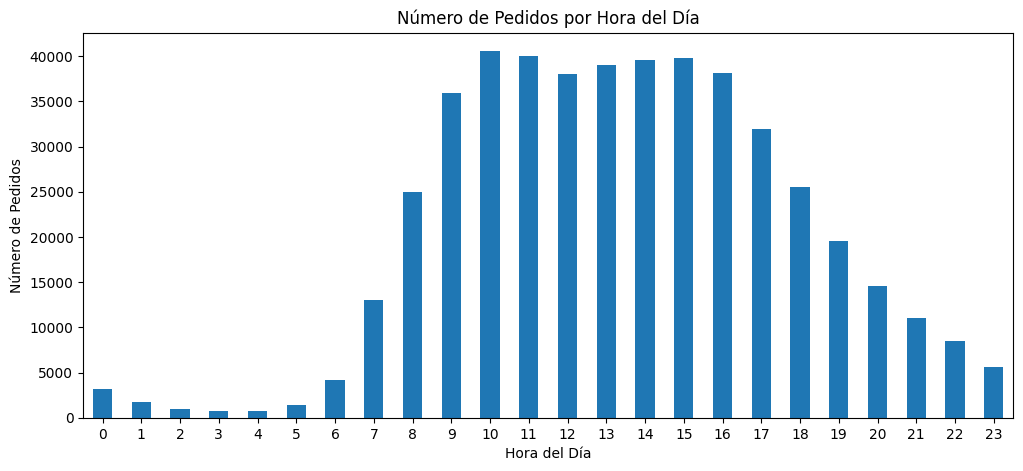

In [39]:
# Traza un gráfico que demuestre cuantas personas hacen órdenes para cada hora del día
hourly_order_count = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

hourly_order_count.plot(x='hourly_order_count.index',
                        y='hourly_order_count.values',
                        kind='bar',
                        title='Número de Pedidos por Hora del Día',
                        rot= 0,
                        xlabel= 'Hora del Día',
                        ylabel='Número de Pedidos',
                        figsize=(12,5)
                       )
plt.show()

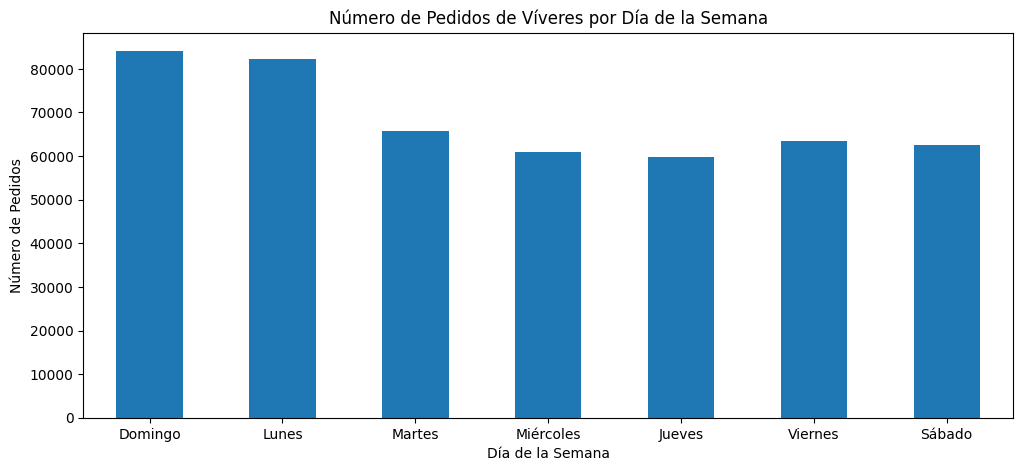

In [40]:
# Traza un gráfico que demuestre que día de la semana compran víveres las personas
day_of_week_counts = df_instacart_orders['order_dow'].value_counts().sort_index()
day_names = {
    0: 'Domingo',
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado'
}

day_of_week_counts.index = [day_names[day] for day in day_of_week_counts.index]


day_of_week_counts.plot(
                        x='day_of_weel_countd.index',
                        y= 'day_of the week_counts.values',
                        kind= 'bar',
                        title= 'Número de Pedidos de Víveres por Día de la Semana',
                        rot= 0,
                        xlabel= 'Día de la Semana',
                        ylabel= 'Número de Pedidos',
                        figsize= (12, 5)
                        )
plt.show()

El valor mínimo en 'days_since_prior_order' es: 0.0 días
El valor máximo en 'days_since_prior_order' es: 30.0 días


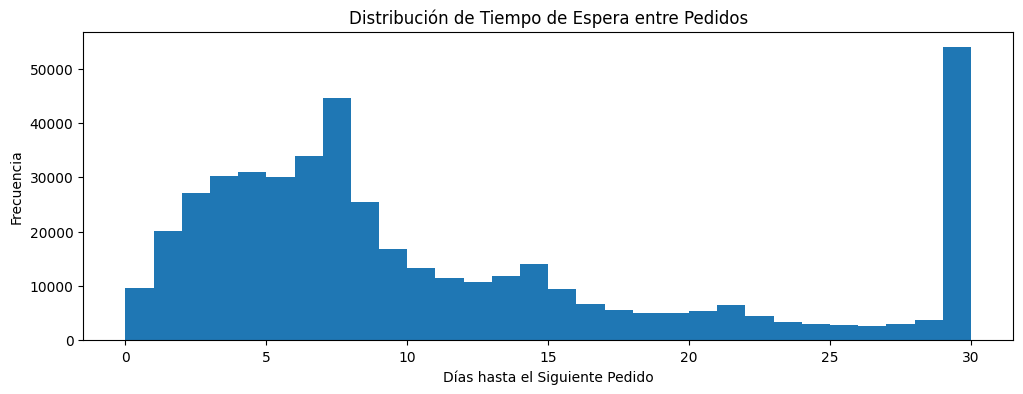

In [41]:
# Traza un gráfico que demuestre cuanto tiempo esperan las personas hasta hacer otro pedido
min_days_since_prior_order = df_instacart_orders['days_since_prior_order'].min()
max_days_since_prior_order = df_instacart_orders['days_since_prior_order'].max()

print(f"El valor mínimo en 'days_since_prior_order' es: {min_days_since_prior_order} días")
print(f"El valor máximo en 'days_since_prior_order' es: {max_days_since_prior_order} días")


df_instacart_orders['days_since_prior_order'].plot(
                                                    kind='hist',
                                                    bins=30,
                                                    title= 'Distribución de Tiempo de Espera entre Pedidos',
                                                    xlabel= 'Días hasta el Siguiente Pedido',
                                                    ylabel= 'Frecuencia',
                                                    figsize= (12, 4)
                                                    )
plt.show()

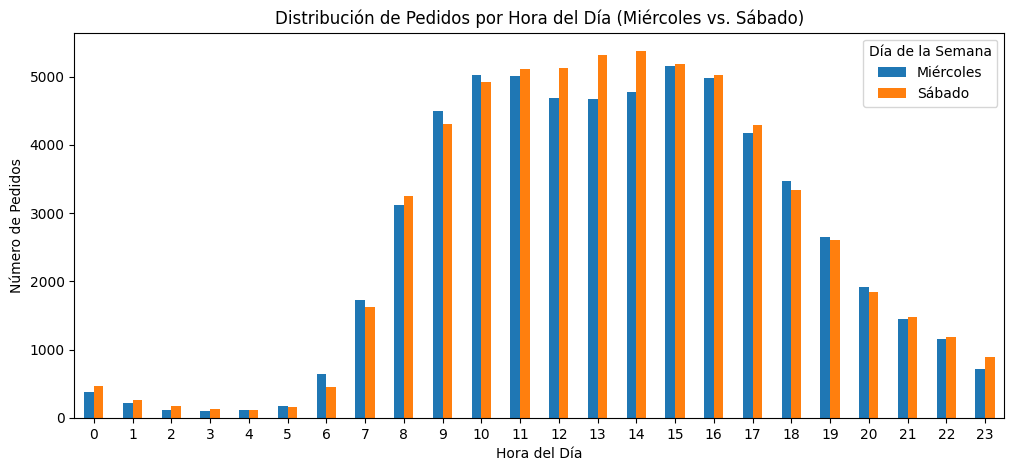

In [42]:
# Diferencia entre miércoles y sábados para 'order_hour_of_day'. Traza gráficos de barra para los dos días y describe las diferencias que veas.
wednesday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 3]
saturday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 6]

wednesday_order_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_order_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

df_hourly_orders = pd.DataFrame(
                                {'Miércoles': wednesday_order_counts.values,
                                 'Sábado': saturday_order_counts.values}, 
                                index=wednesday_order_counts.index)

df_hourly_orders.plot(
                      rot=0,
                      xlabel= 'Hora del Día',
                      ylabel= 'Número de Pedidos',
                      title= 'Distribución de Pedidos por Hora del Día (Miércoles vs. Sábado)',
                      kind='bar', 
                      figsize=(12, 5),
                      )
plt.legend(title='Día de la Semana', labels=['Miércoles', 'Sábado'])
plt.show()

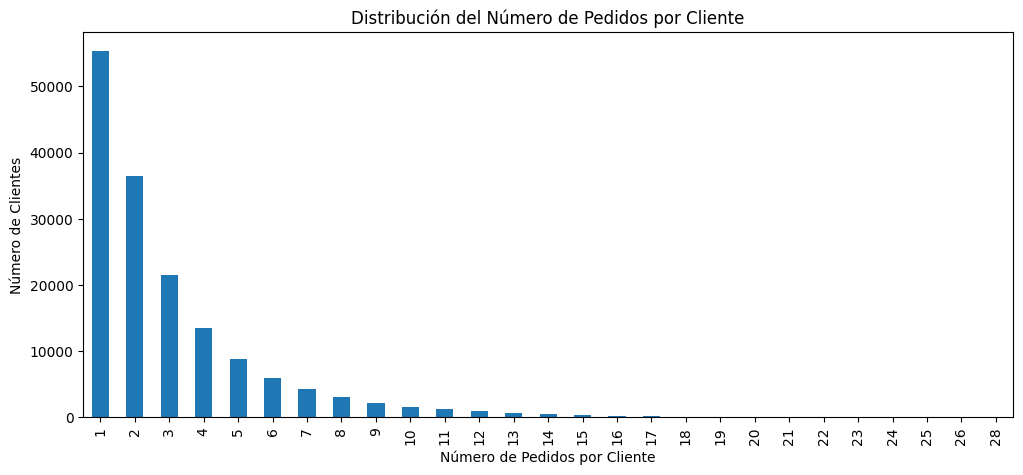

In [43]:
# Traza un gráfico que demuestre cuaul es la distribución para el número de pedidos por cliente
orders_per_customer = df_instacart_orders['user_id'].value_counts()
order_counts = orders_per_customer.value_counts().sort_index()

order_counts.plot(
                  x= 'order_count.index',
                  y= 'order_counts.values',
                  kind= 'bar',
                  title= 'Distribución del Número de Pedidos por Cliente',
                  xlabel= 'Número de Pedidos por Cliente',
                  ylabel= 'Número de Clientes',
                  figsize=(12, 5),
                  )
plt.show()

In [44]:
# Demuestra cuales son los 20 productos más populares (muestra su ID y nombre)
top_20_products_by_purchase_df = pd.merge(df_order_products, df_products, on='product_id')
product_purchase_counts = top_20_products_by_purchase_df.groupby(['product_id', 'product_name'])['add_to_cart_order'].sum().reset_index()
top_20_products_by_purchase = product_purchase_counts.sort_values(by='add_to_cart_order', ascending=False).head(20)
display(top_20_products_by_purchase)

,product_id,product_name,add_to_cart_order
22808,24852,BANANA,325958
12025,13176,BAG OF ORGANIC BANANAS,273772
19370,21137,ORGANIC STRAWBERRIES,272490
20077,21903,ORGANIC BABY SPINACH,255233
43271,47209,ORGANIC HASS AVOCADO,202976
24047,26209,LIMES,171863
43663,47626,LARGE LEMON,171731
43788,47766,ORGANIC AVOCADO,160678
15364,16797,STRAWBERRIES,142624
25666,27966,ORGANIC RASPBERRIES,141043


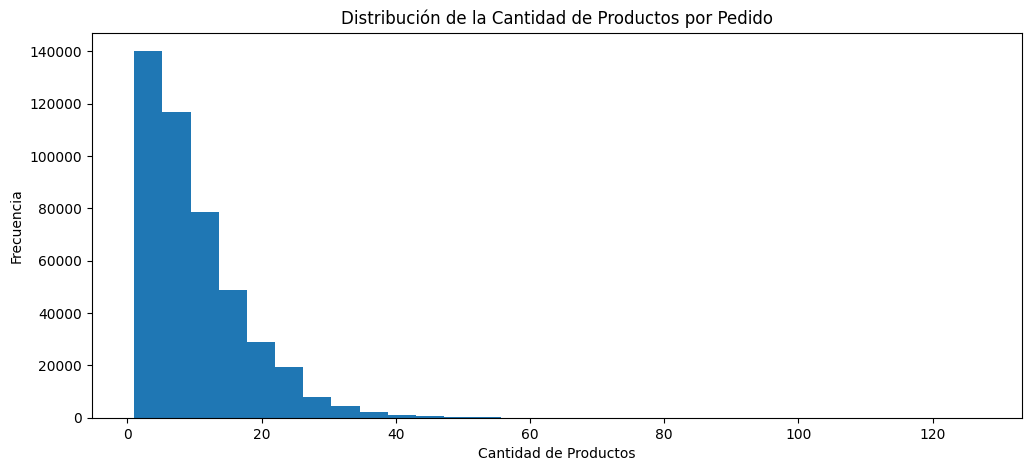

Promedio de productos por pedido: 10.099
Mediana de productos por pedido: 8.0
Mínimo de productos por pedido: 1
Máximo de productos por pedido: 127


In [45]:
# Traza un gráfico que demuestre cuantos artículos compran normalmente las personas en un pedido
order_product_counts = df_order_products.groupby('order_id')['product_id'].count()

order_product_counts.plot(
                          kind= 'hist',
                          bins= 30,
                          title= 'Distribución de la Cantidad de Productos por Pedido',
                          xlabel= 'Cantidad de Productos',
                          ylabel= 'Frecuencia',
                          figsize=(12, 5)
                          )
plt.show()

mean_products_per_order = order_product_counts.mean()
median_products_per_order = order_product_counts.median()
min_products_per_order = order_product_counts.min()
max_products_per_order = order_product_counts.max()

print(f"Promedio de productos por pedido: {mean_products_per_order:.3f}")
print(f"Mediana de productos por pedido: {median_products_per_order}")
print(f"Mínimo de productos por pedido: {min_products_per_order}")
print(f"Máximo de productos por pedido: {max_products_per_order}")

In [46]:
# Demuestra cuales son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)
product_reorder_counts = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()
top_20_reordered_product_ids = product_reorder_counts.head(20).index
top_20_reordered_products = df_products[df_products['product_id'].isin(top_20_reordered_product_ids)][['product_id', 'product_name']]

print("Los 20 principales artículos que se vuelven a pedir con mayor frecuencia:")
display(top_20_reordered_products)

Los 20 principales artículos que se vuelven a pedir con mayor frecuencia:


,product_id,product_name
5875,5876,ORGANIC LEMON
8276,8277,APPLE HONEYCRISP ORGANIC
13175,13176,BAG OF ORGANIC BANANAS
16796,16797,STRAWBERRIES
21136,21137,ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH
22934,22935,ORGANIC YELLOW ONION
24851,24852,BANANA
24963,24964,ORGANIC GARLIC
26208,26209,LIMES


In [47]:
# Para cada producto, demuestra cual es la proporción de las veces que se pide y que se vuelve a pedir
total_orders_per_product = df_order_products['product_id'].value_counts()
repeated_products = df_order_products[df_order_products['reordered'] == 1]
repeated_orders_per_product = repeated_products['product_id'].value_counts()
reorder_rate_per_product = (repeated_orders_per_product / total_orders_per_product).fillna(0)

proportion_reordered = (repeated_orders_per_product / total_orders_per_product).fillna(0)

reorder_info = pd.DataFrame({'product_id': reorder_rate_per_product.index,
                             'reorder_rate': reorder_rate_per_product.values,
                             'proportion_reordered': proportion_reordered.values})

reorder_info = reorder_info.merge(df_products[['product_id', 'product_name']], on='product_id')

display(reorder_info.head(15)) 

,product_id,reorder_rate,proportion_reordered,product_name
0,1,0.564286,0.564286,CHOCOLATE SANDWICH COOKIES
1,2,0.000000,0.000000,ALL-SEASONS SALT
2,3,0.738095,0.738095,ROBUST GOLDEN UNSWEETENED OOLONG TEA
3,4,0.510204,0.510204,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4,7,0.500000,0.500000,PURE COCONUT WATER WITH ORANGE
5,8,0.315789,0.315789,CUT RUSSET POTATOES STEAM N' MASH
6,9,0.761905,0.761905,LIGHT STRAWBERRY BLUEBERRY YOGURT
7,10,0.448071,0.448071,SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE
8,11,0.625000,0.625000,PEACH MANGO JUICE
9,12,0.390244,0.390244,CHOCOLATE FUDGE LAYER CAKE


In [48]:
# Para cada cliente, demuestra que proporción de sus productos ya los había pedido
user_reorder_rates = df_order_products.groupby('order_id')['reordered'].mean()

user_reorder_info = pd.DataFrame({'user_id': user_reorder_rates.index,
                                  'reorder_rate': user_reorder_rates.values})

average_reorder_rate = user_reorder_info['reorder_rate'].mean()

print(f"Promedio de productos repetidos por usuario: {average_reorder_rate * 100:.2f}%")

Promedio de productos repetidos por usuario: 59.96%


In [49]:
# Muestra cuales son los 20 principales artículos que las personas ponen primero en sus carritos
first_added_products = df_order_products[df_order_products['add_to_cart_order'] == 1]
first_added_product_counts = first_added_products['product_id'].value_counts()
top_20_first_added_product_ids = first_added_product_counts.head(20).index

top_20_first_added_products = df_products[df_products['product_id'].isin(top_20_first_added_product_ids)][['product_id', 'product_name']]

print("Los 20 principales artículos que la gente pone primero en sus carritos:")
display(top_20_first_added_products)

Los 20 principales artículos que la gente pone primero en sus carritos:


,product_id,product_name
195,196,SODA
5784,5785,ORGANIC REDUCED FAT 2% MILK
12340,12341,HASS AVOCADOS
13175,13176,BAG OF ORGANIC BANANAS
16796,16797,STRAWBERRIES
19659,19660,SPRING WATER
21136,21137,ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH
24851,24852,BANANA
26208,26209,LIMES
